In [1]:
#Preprocessing
import pandas as pd
import numpy as np
import string
import re
import contractions
import spacy
import nltk
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from cleantext import clean
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

#Model Algorithms
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier,StackingClassifier
from sklearn.ensemble import BaggingClassifier

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import accuracy_score
from sklearn import model_selection
import contractions

import time

import warnings
warnings.filterwarnings('ignore')

C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Read Training Dataset 

In [2]:
train=pd.read_csv("train.csv",encoding="unicode_escape")
test=pd.read_csv("iPhoneTest.csv")
print("Initial :")

print('Train')
print('------------------')
print(train.head())

print('\nTest')
print('------------------')
print(test.head())

Initial :
Train
------------------
       textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment Time of Tweet Age of User  \
0  I`d have responded, if I were going   neutral       morning        0-20   
1                             Sooo SAD  negative          noon       21-30   
2                          bullying me  negative         night       31-45   
3                       leave me alone  negative       morning       46-60   
4                        Sons of ****,  negative          noon       60-70   

       Country  Population -2020  Land Area (Km²)  Density (P/Km²)  
0  Afghanistan    

### Attribute Selection

In [3]:
print('Attribute Selection :')
print('\nTrain')
print('------------------')
train=train[['text','sentiment']]

print(train.head())


print('\nTest')
print('------------------')
test=test[['text','sentiment']]
print('Attribute Selection :')
print(test.head())

Attribute Selection :

Train
------------------
                                                text sentiment
0                I`d have responded, if I were going   neutral
1      Sooo SAD I will miss you here in San Diego!!!  negative
2                          my boss is bullying me...  negative
3                     what interview! leave me alone  negative
4   Sons of ****, why couldn`t they put them on t...  negative

Test
------------------
Attribute Selection :
                                                text sentiment
0                Anyone iPhone 14 or Pro?\n\n#iPhone   neutral
1  I remember the first time i bought a smart Pho...  positive
2  🧵 iPhone 14 Pro Max, my take:\n\nAfter using t...  positive
3  I have started saving for the next #iPhone wha...   neutral
4  Mf #iphone after this fucking update everythin...  negative


### Drop rows with null values 

In [4]:
train.isnull().sum()
train=train.dropna(axis=0)

test.isnull().sum()
test=test.dropna(axis=0)

### Convert to lowercase 

In [5]:
print('Lowercase')
print('\nTrain')
print('------------------')
train['text']=train['text'].str.lower()
print(train['text'].head())

print('\nTest')
print('------------------')
test['text']=test['text'].str.lower()
print('Lowercase')
print(test['text'].head())

Lowercase

Train
------------------
0                  i`d have responded, if i were going
1        sooo sad i will miss you here in san diego!!!
2                            my boss is bullying me...
3                       what interview! leave me alone
4     sons of ****, why couldn`t they put them on t...
Name: text, dtype: object

Test
------------------
Lowercase
0                  anyone iphone 14 or pro?\n\n#iphone
1    i remember the first time i bought a smart pho...
2    🧵 iphone 14 pro max, my take:\n\nafter using t...
3    i have started saving for the next #iphone wha...
4    mf #iphone after this fucking update everythin...
Name: text, dtype: object


### Remove URL

In [6]:
print('Remove URL')
print('\nTrain')
print('------------------')
train['text'] = train['text'].replace('((www.[^\s]+)|(https?://[^\s]+))', '', regex = True)
print("Remove URL: ")
print(train['text'].head())


print('\nTest')
print('------------------')
test['text'] = test['text'].replace('((www.[^\s]+)|(https?://[^\s]+))', '', regex = True)
print(test['text'].head())

Remove URL

Train
------------------
Remove URL: 
0                  i`d have responded, if i were going
1        sooo sad i will miss you here in san diego!!!
2                            my boss is bullying me...
3                       what interview! leave me alone
4     sons of ****, why couldn`t they put them on t...
Name: text, dtype: object

Test
------------------
0                  anyone iphone 14 or pro?\n\n#iphone
1    i remember the first time i bought a smart pho...
2    🧵 iphone 14 pro max, my take:\n\nafter using t...
3    i have started saving for the next #iphone wha...
4    mf #iphone after this fucking update everythin...
Name: text, dtype: object


### Remove Emoji 

In [7]:
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

print('Remove Emoji')
print('\nTrain')
print('------------------')
train['text'] = train['text'].apply(lambda text: remove_emojis(text))
print(train['text'].head())


print('\nTest')
print('------------------')
test['text'] = test['text'].apply(lambda text: remove_emojis(text))
print(test['text'].head())

Remove Emoji

Train
------------------
0                  i`d have responded, if i were going
1        sooo sad i will miss you here in san diego!!!
2                            my boss is bullying me...
3                       what interview! leave me alone
4     sons of ****, why couldn`t they put them on t...
Name: text, dtype: object

Test
------------------
0                  anyone iphone 14 or pro?\n\n#iphone
1    i remember the first time i bought a smart pho...
2     iphone 14 pro max, my take:\n\nafter using th...
3    i have started saving for the next #iphone wha...
4    mf #iphone after this fucking update everythin...
Name: text, dtype: object


### Remove @user 

In [8]:
print('Remove @ User')
print('\nTrain')
print('------------------')
train['text'] = train['text'].replace('(@[^\s]+)', '', regex = True)
print("Remove @user: ")
print(train['text'].head())

print('\nTest')
print('------------------')
test['text'] = test['text'].replace('(@[^\s]+)', '', regex = True)
print("Remove @user: ")
print(test['text'].head())

Remove @ User

Train
------------------
Remove @user: 
0                  i`d have responded, if i were going
1        sooo sad i will miss you here in san diego!!!
2                            my boss is bullying me...
3                       what interview! leave me alone
4     sons of ****, why couldn`t they put them on t...
Name: text, dtype: object

Test
------------------
Remove @user: 
0                  anyone iphone 14 or pro?\n\n#iphone
1    i remember the first time i bought a smart pho...
2     iphone 14 pro max, my take:\n\nafter using th...
3    i have started saving for the next #iphone wha...
4    mf #iphone after this fucking update everythin...
Name: text, dtype: object


### Remove # keyword 

In [9]:
print('Remove #')
print('\nTrain')
print('------------------')
train['text'] = train['text'].replace('(#[^\s]+)', '', regex = True)
print("Remove #keyword: ")
print(train['text'].head())


print('\nTest')
print('------------------')
test['text'] = test['text'].replace('(#[^\s]+)', '', regex = True)
print("Remove #keyword: ")
print(test['text'].head())

Remove #

Train
------------------
Remove #keyword: 
0                  i`d have responded, if i were going
1        sooo sad i will miss you here in san diego!!!
2                            my boss is bullying me...
3                       what interview! leave me alone
4     sons of ****, why couldn`t they put them on t...
Name: text, dtype: object

Test
------------------
Remove #keyword: 
0                         anyone iphone 14 or pro?\n\n
1    i remember the first time i bought a smart pho...
2     iphone 14 pro max, my take:\n\nafter using th...
3     i have started saving for the next  whatever pro
4    mf  after this fucking update everything has b...
Name: text, dtype: object


### Remove numerical characters 

In [10]:
print('Remove numerical characters')
print('\nTrain')
print('------------------')
train['text'] = train['text'].replace('[0-9]+', '', regex = True)
print(train['text'].head())

print('\nTest')
print('------------------')
test['text'] = test['text'].replace('[0-9]+', '', regex = True)
print("Remove numbers: ")
print(test['text'].head())

Remove numerical characters

Train
------------------
0                  i`d have responded, if i were going
1        sooo sad i will miss you here in san diego!!!
2                            my boss is bullying me...
3                       what interview! leave me alone
4     sons of ****, why couldn`t they put them on t...
Name: text, dtype: object

Test
------------------
Remove numbers: 
0                           anyone iphone  or pro?\n\n
1    i remember the first time i bought a smart pho...
2     iphone  pro max, my take:\n\nafter using the ...
3     i have started saving for the next  whatever pro
4    mf  after this fucking update everything has b...
Name: text, dtype: object


### Expand contractions

In [11]:
def expand_contractions(text):
    return " ".join([contractions.fix(word) for word in str(text).split()])
    
    
print('Expand contractions')
print('\nTrain')
print('------------------')
train['text'] = train['text'].apply(lambda text: expand_contractions(text))
print(train['text'].head())

print('\nTest')
print('------------------')
test['text'] = test['text'].apply(lambda text: expand_contractions(text))
print(test['text'].head())

Expand contractions

Train
------------------
0                  i`d have responded, if i were going
1        sooo sad i will miss you here in san diego!!!
2                            my boss is bullying me...
3                       what interview! leave me alone
4    sons of ****, why couldn`t they put them on th...
Name: text, dtype: object

Test
------------------
0                                anyone iphone or pro?
1    i remember the first time i bought a smart pho...
2    iphone pro max, my take: after using the new i...
3      i have started saving for the next whatever pro
4    mf after this fucking update everything has be...
Name: text, dtype: object


### Remove punctuation 

In [12]:
print('Remove punctuation')
print('\nTrain')
print('------------------')
train['text'] = train['text'].str.translate(str.maketrans('', '', string.punctuation))
print("Remove punctuation: ")
print(train['text'].head())

print('\nTest')
print('------------------')
test['text'] = test['text'].str.translate(str.maketrans('', '', string.punctuation))
print("Remove punctuation: ")
print(test['text'].head())

Remove punctuation

Train
------------------
Remove punctuation: 
0                    id have responded if i were going
1           sooo sad i will miss you here in san diego
2                               my boss is bullying me
3                        what interview leave me alone
4    sons of  why couldnt they put them on the rele...
Name: text, dtype: object

Test
------------------
Remove punctuation: 
0                                 anyone iphone or pro
1    i remember the first time i bought a smart pho...
2    iphone pro max my take after using the new i h...
3      i have started saving for the next whatever pro
4    mf after this fucking update everything has be...
Name: text, dtype: object


### Remove repeated keywords

In [13]:
print('Remove repeated keywords :')
print('\nTrain')
print('------------------')
train['text'] = train['text'].replace(r'(.)\1+', r'\1\1', regex = True)
print(train['text'].head())

print('\nTest')
print('------------------')
test['text'] = test['text'].replace(r'(.)\1+', r'\1\1', regex = True)
print(test['text'].head())

Remove repeated keywords :

Train
------------------
0                    id have responded if i were going
1            soo sad i will miss you here in san diego
2                               my boss is bullying me
3                        what interview leave me alone
4    sons of  why couldnt they put them on the rele...
Name: text, dtype: object

Test
------------------
0                                 anyone iphone or pro
1    i remember the first time i bought a smart pho...
2    iphone pro max my take after using the new i h...
3      i have started saving for the next whatever pro
4    mf after this fucking update everything has be...
Name: text, dtype: object


###  Remove Stopwords 

In [14]:
stop_words = set(stopwords.words('english'))
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])

print("Remove stopwords: ")
print('\nTrain')
print('------------------')
train['text'] = train['text'].apply(lambda text: cleaning_stopwords(text))
print(train['text'].head())

print('\nTest')
print('------------------')
test['text'] = test['text'].apply(lambda text: cleaning_stopwords(text))
print(test['text'].head())

Remove stopwords: 

Train
------------------
0                          id responded going
1                      soo sad miss san diego
2                               boss bullying
3                       interview leave alone
4    sons couldnt put releases already bought
Name: text, dtype: object

Test
------------------
0                                    anyone iphone pro
1    remember first time bought smart phone g showe...
2    iphone pro max take using new noticed interest...
3                     started saving next whatever pro
4    mf fucking update everything become slow canno...
Name: text, dtype: object


### Tokenization

In [15]:
print("Tokenization: ")
print('\nTrain')
print('------------------')
train['text'] = train['text'].apply(nltk.word_tokenize)
print("Tokenization: ")
print(train['text'].head())


print('\nTest')
print('------------------')
test['text'] = test['text'].apply(nltk.word_tokenize)
print("Tokenization: ")
print(test['text'].head())

Tokenization: 

Train
------------------
Tokenization: 
0                             [id, responded, going]
1                       [soo, sad, miss, san, diego]
2                                   [boss, bullying]
3                          [interview, leave, alone]
4    [sons, couldnt, put, releases, already, bought]
Name: text, dtype: object

Test
------------------
Tokenization: 
0                                [anyone, iphone, pro]
1    [remember, first, time, bought, smart, phone, ...
2    [iphone, pro, max, take, using, new, noticed, ...
3               [started, saving, next, whatever, pro]
4    [mf, fucking, update, everything, become, slow...
Name: text, dtype: object


In [16]:
print('\nTrain')
print('------------------')
print(train.head())

print('\nTest')
print('------------------')
print(test.head())


Train
------------------
                                              text sentiment
0                           [id, responded, going]   neutral
1                     [soo, sad, miss, san, diego]  negative
2                                 [boss, bullying]  negative
3                        [interview, leave, alone]  negative
4  [sons, couldnt, put, releases, already, bought]  negative

Test
------------------
                                                text sentiment
0                              [anyone, iphone, pro]   neutral
1  [remember, first, time, bought, smart, phone, ...  positive
2  [iphone, pro, max, take, using, new, noticed, ...  positive
3             [started, saving, next, whatever, pro]   neutral
4  [mf, fucking, update, everything, become, slow...  negative


### Label Encoding 

In [17]:
train['sentiment'] = train['sentiment'].map({"positive": 1, "neutral": 0, "negative": -1})
test['sentiment'] = test['sentiment'].map({"positive": 1, "neutral": 0, "negative": -1})
print('\nTrain')
print('------------------')
print(train.head())

print('\nTest')
print('------------------')
print(test.head())


Train
------------------
                                              text  sentiment
0                           [id, responded, going]          0
1                     [soo, sad, miss, san, diego]         -1
2                                 [boss, bullying]         -1
3                        [interview, leave, alone]         -1
4  [sons, couldnt, put, releases, already, bought]         -1

Test
------------------
                                                text  sentiment
0                              [anyone, iphone, pro]          0
1  [remember, first, time, bought, smart, phone, ...          1
2  [iphone, pro, max, take, using, new, noticed, ...          1
3             [started, saving, next, whatever, pro]          0
4  [mf, fucking, update, everything, become, slow...         -1


In [18]:
print('\nTrain')
print('------------------')
print(train['sentiment'].value_counts())

print('\nTest')
print('------------------')
print(test['sentiment'].value_counts())


Train
------------------
 0    11117
 1     8582
-1     7781
Name: sentiment, dtype: int64

Test
------------------
-1    126
 1    107
 0     77
Name: sentiment, dtype: int64


### POS 

In [19]:
print("POS : ")
print('\nTrain')
print('------------------')
train['text'] = train['text'].apply(nltk.pos_tag)
print("POS tagging: ")
print(train['text'].head())

print('\nTest')
print('------------------')
test['text'] = test['text'].apply(nltk.pos_tag)
print("POS tagging: ")
print(test['text'].head())

POS : 

Train
------------------
POS tagging: 
0           [(id, NN), (responded, VBD), (going, VBG)]
1    [(soo, JJ), (sad, JJ), (miss, NN), (san, NN), ...
2                        [(boss, IN), (bullying, VBG)]
3         [(interview, NN), (leave, VBP), (alone, RB)]
4    [(sons, NNS), (couldnt, VBP), (put, VBN), (rel...
Name: text, dtype: object

Test
------------------
POS tagging: 
0              [(anyone, NN), (iphone, CD), (pro, NN)]
1    [(remember, VB), (first, JJ), (time, NN), (bou...
2    [(iphone, JJ), (pro, JJ), (max, NNS), (take, V...
3    [(started, VBN), (saving, VBG), (next, JJ), (w...
4    [(mf, NN), (fucking, VBG), (update, JJ), (ever...
Name: text, dtype: object


### Lemmatization

In [20]:
def get_wordnet_pos(treebank_pos):
    if treebank_pos.startswith('J'):
        return wordnet.ADJ
    elif treebank_pos.startswith('V'):
        return wordnet.VERB
    elif treebank_pos.startswith('N'):
        return wordnet.NOUN
    elif treebank_pos.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def lemmatization(text):
    lemmatized_tokens = []

    for i in range(len(text)):
        word, pos = text[i]
        
        lemmatized_tokens.append(nltk.WordNetLemmatizer().lemmatize(word, get_wordnet_pos(pos)))
        
    return " ".join(lemmatized_tokens)

print("Lemmatization : ")
print('\nTrain')
print('------------------')
train['text'] = train['text'].apply(lambda text: lemmatization(text))
print(train['text'].head())


print('\nTest')
print('------------------')
test['text'] = test['text'].apply(lambda text: lemmatization(text))
print(test['text'].head())

Lemmatization : 

Train
------------------
0                          id respond go
1                 soo sad miss san diego
2                              bos bully
3                  interview leave alone
4    son couldnt put release already buy
Name: text, dtype: object

Test
------------------
0                                    anyone iphone pro
1    remember first time buy smart phone g show gra...
2    iphone pro max take use new notice interesting...
3                         start save next whatever pro
4    mf fuck update everything become slow can not ...
Name: text, dtype: object


### Train Test Split

In [21]:
X_train=train['text']
X_test=test['text']
y_train=train['sentiment']
y_test=test['sentiment']

In [22]:
tfidf_vectorizer= TfidfVectorizer(max_df=0.90, min_df=2,max_features =1000)
X_train = tfidf_vectorizer.fit_transform(X_train) #Tokenize and build vocabulary
X_test = tfidf_vectorizer.transform(X_test) #Tokenize and build vocabulary

In [23]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(27480, 1000)
(27480,)
(310, 1000)
(310,)


## Ensemble Model 

#### Confusion Matrix 

In [24]:
def confusion_matrix_evaluation(classifier,y_predicted):
    mat=confusion_matrix(y_test,y_predicted)
    sns.heatmap(mat.T, xticklabels=['Predicted 1','Predicted 0','Predicted -1'],yticklabels=['Actual 1','Actual 0','Actual -1'],
                annot=True, fmt='d', cbar=False,cmap="YlGnBu")
    plt.title('Confusion Matrix for '+classifier)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig("confusion_matrix.png")
    plt.show()
    print(classifier+' Classification Report ')
    print('======================================================')
    print(classification_report(y_test,y_predicted))

#### Define Base Learners 

In [25]:
from sklearn.ensemble import RandomForestClassifier
m1=SVC(C=0.1,kernel='linear',random_state=1)
m2=MultinomialNB(alpha=20)
m3=RandomForestClassifier(random_state=1,max_leaf_nodes=65,max_depth=100)
m4=LogisticRegression(multi_class='multinomial',random_state=1,solver='saga')

In [26]:
def model_accuracy(m1,m2,m3,m4,classifier):
    print('Doing 2-fold Cross Validation Here :')
    for iterclf,iterlabel in zip([m1,m2,m3,m4,classifier],
                             ['SVC',
                              'MNB',
                              'Random Forest Tree',
                              'Logistic Regression',
                               classifier
                             ]):
     start_time = time.time()
     scores=model_selection.cross_val_score(iterclf,X_train,y_train,cv=2,scoring='accuracy')
     run_time = time.time() - start_time
     print('Accuracy :%0.6f  (+/- %0.4f)  [%20s]   ||  %4.2f seconds'%(scores.mean(),scores.std(),iterlabel,run_time))

### Voting 

Doing 2-fold Cross Validation Here :
Accuracy :0.627147  (+/- 0.0008)  [                 SVC]   ||  42.29 seconds
Accuracy :0.592722  (+/- 0.0013)  [                 MNB]   ||  0.02 seconds
Accuracy :0.665102  (+/- 0.0028)  [  Random Forest Tree]   ||  2.68 seconds
Accuracy :0.683333  (+/- 0.0010)  [ Logistic Regression]   ||  0.20 seconds
Accuracy :0.650255  (+/- 0.0021)  [VotingClassifier(estimators=[('SVC',
                              SVC(C=0.1, kernel='linear', random_state=1)),
                             ('Multinomial Naive Bayes',
                              MultinomialNB(alpha=20)),
                             ('Random Forest Tree',
                              RandomForestClassifier(max_depth=100,
                                                     max_leaf_nodes=65,
                                                     random_state=1)),
                             ('Logistic Regression',
                              LogisticRegression(multi_class='multinomial',
     

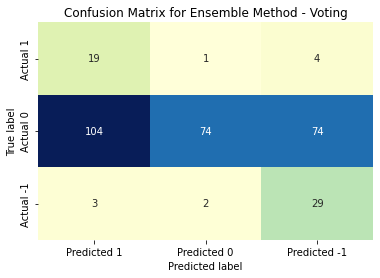

Ensemble Method - Voting Classification Report 
              precision    recall  f1-score   support

          -1       0.79      0.15      0.25       126
           0       0.29      0.96      0.45        77
           1       0.85      0.27      0.41       107

    accuracy                           0.39       310
   macro avg       0.65      0.46      0.37       310
weighted avg       0.69      0.39      0.36       310

Training Accuracy : 0.6861    ||   Training Time  48.28 seconds


In [27]:
votingCLF=VotingClassifier([('SVC',m1),('Multinomial Naive Bayes',m2),('Random Forest Tree',m3),('Logistic Regression',m4)
                       ])
model_accuracy(m1,m2,m3,m4,votingCLF)  
start_time = time.time()
votingCLF.fit(X_train,y_train)
run_time = time.time() - start_time
predicted_Vote=votingCLF.predict(X_test)

print('\t\t\t Voting')
print('================================================================\n')
confusion_matrix_evaluation('Ensemble Method - Voting',predicted_Vote)
print('Training Accuracy : %.4f    ||   Training Time  %4.2f seconds' % (votingCLF.score(X_train, y_train),run_time))

#### Bagging  

Doing 2-fold Cross Validation Here :
Accuracy :0.627147  (+/- 0.0008)  [                 SVC]   ||  42.62 seconds
Accuracy :0.592722  (+/- 0.0013)  [                 MNB]   ||  0.02 seconds
Accuracy :0.665102  (+/- 0.0028)  [  Random Forest Tree]   ||  3.65 seconds
Accuracy :0.683333  (+/- 0.0010)  [ Logistic Regression]   ||  0.22 seconds
Accuracy :0.657351  (+/- 0.0013)  [BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=100,
                                                        max_leaf_nodes=65,
                                                        random_state=1),
                  max_samples=0.7, n_estimators=20, oob_score=True,
                  random_state=1)]   ||  53.68 seconds
			 Bagging



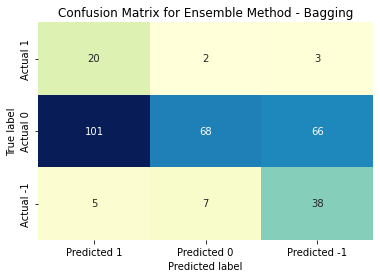

Ensemble Method - Bagging Classification Report 
              precision    recall  f1-score   support

          -1       0.80      0.16      0.26       126
           0       0.29      0.88      0.44        77
           1       0.76      0.36      0.48       107

    accuracy                           0.41       310
   macro avg       0.62      0.47      0.39       310
weighted avg       0.66      0.41      0.38       310

Training Accuracy : 0.6731   ||   Training Time  35.58 seconds


In [30]:
bag_model=BaggingClassifier(
    base_estimator=RandomForestClassifier(random_state=1,max_leaf_nodes=65,max_depth=100),
    n_estimators=20, #n_estimator - how many subgroup of dataset
    max_samples=0.7, #Use 80%of sample
    oob_score=True, #Out of bag 
    random_state=1
)
model_accuracy(m1,m2,m3,m4,bag_model) 
start_time = time.time()
bag_model.fit(X_train,y_train)
run_time = time.time() - start_time
predictedBag=bag_model.predict(X_test)
score_Bag=accuracy_score(predictedBag,y_test)

print('\t\t\t Bagging')
print('================================================================\n')
confusion_matrix_evaluation('Ensemble Method - Bagging',predictedBag)
print('Training Accuracy : %.4f   ||   Training Time  %4.2f seconds' % (bag_model.score(X_train, y_train),run_time))

### Stacking 

Doing 2-fold Cross Validation Here :
Accuracy :0.627147  (+/- 0.0008)  [                 SVC]   ||  38.04 seconds
Accuracy :0.592722  (+/- 0.0013)  [                 MNB]   ||  0.01 seconds
Accuracy :0.665102  (+/- 0.0028)  [  Random Forest Tree]   ||  3.46 seconds
Accuracy :0.683333  (+/- 0.0010)  [ Logistic Regression]   ||  0.37 seconds
Accuracy :0.696361  (+/- 0.0033)  [StackingClassifier(estimators=[('SVC',
                                SVC(C=0.1, kernel='linear', random_state=1)),
                               ('Multinomial Naive Bayes',
                                MultinomialNB(alpha=20)),
                               ('Random Forest Tree',
                                RandomForestClassifier(max_depth=100,
                                                       max_leaf_nodes=65,
                                                       random_state=1)),
                               ('Logistic Regression',
                                LogisticRegression(multi_class=

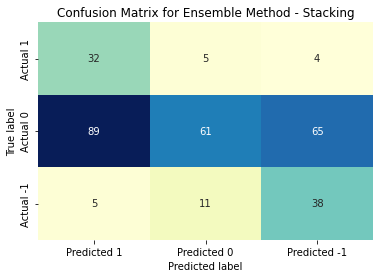

Ensemble Method - Stacking Classification Report 
              precision    recall  f1-score   support

          -1       0.78      0.25      0.38       126
           0       0.28      0.79      0.42        77
           1       0.70      0.36      0.47       107

    accuracy                           0.42       310
   macro avg       0.59      0.47      0.42       310
weighted avg       0.63      0.42      0.42       310

Training Accuracy : 0.7211   ||   Training Time  238.68 seconds


In [29]:
stackingCLF=StackingClassifier([('SVC',m1),('Multinomial Naive Bayes',m2),('Random Forest Tree',m3),('Logistic Regression',m4)
                       ])
model_accuracy(m1,m2,m3,m4,stackingCLF)   
start_time = time.time()
stackingCLF.fit(X_train,y_train)
run_time = time.time() - start_time
stack_predicted=stackingCLF.predict(X_test)

print('\t\t\t Stacking')
print('================================================================\n')
confusion_matrix_evaluation('Ensemble Method - Stacking',stack_predicted)
print('Training Accuracy : %.4f   ||   Training Time  %4.2f seconds' % (stackingCLF.score(X_train, y_train),run_time))